## Selection readnumber distributions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

In [9]:
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

sn_color='#71cb69ff'
ap_color='#f9bc0cff'
au_color='#2e3192ff'

In [3]:
#init_dataset = '/home/kurfurst/Documents/datasets/KS_CDP_round0.tsv'
select_dataset = '/home/kurfurst/Documents/datasets/MV_apollon_reselection.tsv'

In [4]:
def prepDataset(f):
    df = pd.read_csv(f, sep='\t', names=['count', 'seq'])
    df['ppm'] = (df['count'] / df['count'].sum()) * 1000000
    return df

In [5]:
#df_init = prepDataset(init_dataset)
df_select = prepDataset(select_dataset)

In [6]:
# Make readnumber distribution plots
#vc_init = df_init['ppm'].value_counts(normalize=False)
vc_select = df_select['ppm'].value_counts(normalize=False)

In [7]:
def getBinomDistribution(trials, success_prob, r_values):
    rv = binom(trials, success_prob)
    dist = {x:rv.pmf(x) for x in r_values}
    return pd.Series(dist)

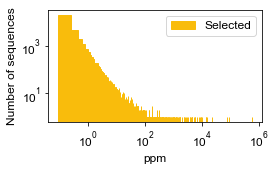

In [10]:
a = 1
color_init = 'grey'
color_select = ap_color

plt.figure(figsize=(4, 2.5))
plt.bar(vc_select.index, vc_select.values, alpha=a, width=vc_select.index.min(), color=color_select, edgecolor=color_select, label='Selected')
#plt.bar(vc_init.index, vc_init.values, alpha=0.8, width=vc_init.index.min(), color=color_init, label='Unselected')

plt.xlabel('ppm')
plt.ylabel('Number of sequences')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('Readnumber_distribution_REselection.png', dpi=300)